# 雛型

ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

# 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。  

仮定関数$
h
θ
(
x
)$
 の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。


# 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。  
なお、この数式には正則化項が含まれています。  
＊数式が見切れる場合、DIVERを全画面にして御覧ください。

In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris_dataset = load_iris()#データを抜き出す

X = pd.DataFrame(iris_dataset.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],)# 特徴量をDF化
y = pd.DataFrame(iris_dataset.target, columns=['Species'])# ラベルをDF化
# virgicolorとvirginica　　df_s = df.sort_index()　　df_r = df.reset_index()
y = y.iloc[50:].sort_index()
X = X.iloc[50:].sort_index()
# インデックスを振りなおし、ラベルを0、１に変換
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
y = y.replace(1, 0)
y = y.replace(2, 1)

# display(X.head())
# display(y)
df = pd.concat([X, y], axis=1)
display(df.head())
display(df.tail())

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75)
#　標準化する
scaler = StandardScaler()
scaler.fit(X_train)
# 標準化変形する

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)



,sepal_length,sepal_width,petal_length,petal_width,Species
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


,sepal_length,sepal_width,petal_length,petal_width,Species
95,6.7,3.0,5.2,2.3,1
96,6.3,2.5,5.0,1.9,1
97,6.5,3.0,5.2,2.0,1
98,6.2,3.4,5.4,2.3,1
99,5.9,3.0,5.1,1.8,1


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## クラス作成

In [3]:
# 雛型
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=750, lr=0.01, Lambda=1, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter # 学習回数
        self.lr = lr # 学習率
        self.bias = bias # バイアス項の有無
        self.verbose = verbose # 学習記録の有無
        self.Lambda = Lambda #正則化項の定数
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        
        """
        # バイアス項を入れる
        hoge = np.ones((X.shape[0],1))
        if self.bias == False:
            # Xの0列目に１を代入
            X = np.concatenate([hoge,X],axis=1)
            
            #検証用データ有り
            if X_val is not None and y_val is not None:
                hoge_0 = np.ones((X_val.shape[0],1))
                # X_valの0列目に１を代入
                X_val = np.concatenate([hoge_0, X_val],axis=1)
        
        #パラメータの初期値
        np.random.seed(0)
        self.coef_ = np.random.rand(X.shape[1])#[np.newaxis, :]
        self.coef_ = self.coef_[np.newaxis, :]
        
        #カウント
        count = 0
        
        #学習
        for i in range(self.iter):
            
            #sigimoid_func
            y_hat = self._sigmoid(X)
            #errorを定義する
            error = y_hat - y
            #損失をリストに格納していく
            self.loss[i] = self._target_function(X, y)
            #パラメータを更新していく
            self.coef_ = self._gradient_descent(X, error)
            
            #検証用データ有り
            if X_val is not None and y_val is not None:
                #検証用データの損失をリストに格納していく
                self.val_loss[i] = self._target_function(X_val, y_val)
                #損失の記録を出力する場合
                if self.verbose == True:
                    count += 1
                    print('{}回目 : 学習用データの記録 : {}'.format(count, self.loss[i]))
                    #検証用データ有り
                    if X_val is not None and y_val is not None:
                        print('{}回目 : 検証用データの記録 : {}'.format(count, self.val_loss[i]))
                    
    def predict(self, X, threshold=0.5):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # バイアス項を入れる
        hoge = np.ones((X.shape[0],1))
        if self.bias == False:
            X = np.concatenate([hoge,X],axis=1) # Xの0列目に１を代入
            
        x_sig = np.dot(X, self.coef_.T) # n_sample * 1 
        sigmoid_0 = 1 / (1 + np.exp(-x_sig))
        
        y_pred = np.where(sigmoid_0 >= threshold, 1, 0)
        y_pred = np.ravel(y_pred).T
        return y_pred
        
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # バイアス項を入れる
        hoge = np.ones((X.shape[0],1))
        if self.bias == False:
            X = np.concatenate([hoge,X],axis=1) # Xの0列目に１を代入
            
        x_sig = np.dot(X, self.coef_.T) # n_sample * 1 
        sigmoid_0 = 1 / (1 + np.exp(-x_sig))
        sigmoid_0 = np.ravel(sigmoid_0).T

        return sigmoid_0
    
    
    def _sigmoid(self, X): # 仮定関数sigmoidメソッドを定義する
        '''
        Parmeter
        ----------
        z : ndarray, shape ( n_samples, 1)
        
        Return
        ----------
        シグモイド関数
        '''
        x_sig = np.dot(X, self.coef_.T) # n_sample * 1
        
        return 1 / (1 + np.exp(-x_sig))
    
    def _gradient_descent(self, X, error): # 最急降下法
        """
        X : 次の形のndarray, shape (n_samples, n_features)
                学習用データの特徴量
         error : 次の形のndarray, shape (n_samples, )

        """
        
        #正則化項　(n_samples, 1)
        avatar = np.copy(self.coef_) #(n_feature, 1)
        avatar[0] = 0 #バイアス項は正則化を適用しないので”０”にする
        m = X.shape[0] # Xのn_samples(yの要素数)
        g_d_1 = np.dot(error.T, X) # (n_samples, )
        self.reg_term_0 = (self.Lambda/m) * avatar #(1, n_features)(正則化項)
        
        self.coef_ = self.coef_ - (self.lr / m) * g_d_1 - self.reg_term_0
        
        return self.coef_
    

    def _target_function(self, X, y): # 目的関数(損失関数）
        
        #sigmoidfunctionの返り値
        y_hat = self._sigmoid(X)
        # 要素数(n_samples)
        m = len(y)
        #avatarの0番目に0を代入,バイアス項は正則化を適用しないので0にする
        avatar = np.copy(self.coef_) #(n_feature, 1)
        avatar[0] = 0
        # 正則化項
        self.reg_term_1 = (self.Lambda / 2 * m) * np.sum(avatar**2) #(n_features, )
        # 損失関数の各パーツ
        step1 = -y*np.log(y_hat)
        step2 = 1 - y
        step3 = np.log(1 - y_hat)
        # 損失関数
        objective_function = (np.sum(step1 - step2 * step3)/m ) + self.reg_term_1
        
        return objective_function

# 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。  
scikit-learnによる実装と比べ、正しく動いているかを確認してください。  
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

## Scratch

### 学習

In [4]:
# 学習(biasFalse, verbos=False)
clf_slr = ScratchLogisticRegression(num_iter=500, lr=0.1, bias=False, verbose=False)
clf_slr.fit(X_train_transformed, y_train)

print(clf_slr)


### predict

In [5]:
#推定
clf_slr_predict = clf_slr.predict(X_test_transformed)
print(clf_slr_predict)

[0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0]


### predict_proba

In [6]:
#proba
clf_slr_predict_proba = clf_slr.predict_proba(X_test_transformed)
print(clf_slr_predict_proba)

[1.03143220e-01 1.81802062e-01 6.38769538e-01 9.89207931e-01
 9.91636671e-01 9.12038359e-01 5.73382292e-04 9.94460219e-01
 8.68494592e-01 1.43164209e-03 9.16359339e-01 9.99225538e-01
 8.77893959e-01 9.91175331e-01 3.37532880e-02 9.92395350e-01
 4.87547839e-01 9.87247271e-02 1.81707837e-02 9.50743002e-02
 2.63139522e-03 4.35253331e-01 3.93581837e-02 2.15573322e-02
 6.58027098e-02]


### 指標値

In [7]:
# 5つの指標を出力する関数
def index_5(predict_train, data_name): #predict_train=predict(X_test), data_name=file_name
    
    ind_5 = {"Accuracy" : [accuracy_score(y_test, predict_train)*100],
            "Precision" : [precision_score(y_test, predict_train)*100],
            "Recall" : [recall_score(y_test, predict_train)*100],
            "F1" : [f1_score(y_test, predict_train)],
            "ConfusionMatrix" : [confusion_matrix(y_test, predict_train)]
            }
    index1 = [data_name]
    all = pd.DataFrame(data=ind_5, index=index1)
    
    return all

In [8]:
scratch = index_5(clf_slr_predict, 'Scratch')
display(scratch)

,Accuracy,Precision,Recall,F1,ConfusionMatrix
Scratch,88.0,90.909091,83.333333,0.869565,"[[12, 1], [2, 10]]"


### coef_

In [9]:
clf_slr.coef_

array([[ 0.18488901, -0.12900658, -0.59774387,  2.45958364,  2.59935317]])

## scikit_learn

### 学習、推定

In [10]:
 # データを学習させる 
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train_transformed, y_train) #訓練用データを学習させる
# ロジスティック回帰モデルによる検証用データで予測する
clf_predict = clf.predict(X_test_transformed) 
print(clf_predict)
print(type(clf))

[0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0]
<class 'sklearn.linear_model.logistic.LogisticRegression'>


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Predict_Proba

In [11]:
clf_predict_proba = clf.predict_proba(X_test_transformed)
print(clf_predict_proba)

[[8.94328161e-01 1.05671839e-01]
 [8.81912932e-01 1.18087068e-01]
 [3.16234860e-01 6.83765140e-01]
 [2.48251474e-02 9.75174853e-01]
 [7.36297411e-03 9.92637026e-01]
 [8.24117306e-02 9.17588269e-01]
 [9.99130524e-01 8.69475804e-04]
 [3.45175686e-03 9.96548243e-01]
 [1.96599626e-01 8.03400374e-01]
 [9.98321838e-01 1.67816180e-03]
 [5.81455964e-02 9.41854404e-01]
 [1.24542995e-03 9.98754570e-01]
 [1.35395760e-01 8.64604240e-01]
 [1.29403334e-02 9.87059667e-01]
 [9.77574521e-01 2.24254785e-02]
 [1.19988260e-02 9.88001174e-01]
 [3.11438126e-01 6.88561874e-01]
 [8.58873622e-01 1.41126378e-01]
 [9.84854387e-01 1.51456126e-02]
 [8.78529893e-01 1.21470107e-01]
 [9.97357925e-01 2.64207500e-03]
 [5.71896146e-01 4.28103854e-01]
 [9.62171249e-01 3.78287506e-02]
 [9.73410150e-01 2.65898497e-02]
 [9.37282348e-01 6.27176520e-02]]


### 指標値

In [12]:
sklearn = index_5(clf_predict, 'Scikitlearn')
display(sklearn)

,Accuracy,Precision,Recall,F1,ConfusionMatrix
Scikitlearn,92.0,91.666667,91.666667,0.916667,"[[12, 1], [1, 11]]"


### 比較

In [13]:
pd.concat([scratch, sklearn])

,Accuracy,Precision,Recall,F1,ConfusionMatrix
Scratch,88.0,90.909091,83.333333,0.869565,"[[12, 1], [2, 10]]"
Scikitlearn,92.0,91.666667,91.666667,0.916667,"[[12, 1], [1, 11]]"


## バイアス項なし, 出力なし

In [14]:
# 学習(bias=True, verbos=False)
clf_slr_0 = ScratchLogisticRegression(num_iter=500, lr=0.1, bias=True, verbose=False)
clf_slr_0.fit(X_train_transformed, y_train)

In [15]:
# 推定
clf_slr_0.predict(X_test_transformed)

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [16]:
# proba
clf_slr_0.predict_proba(X_test_transformed)

array([8.96471679e-02, 1.47837452e-01, 6.06186664e-01, 9.84997235e-01,
       9.89815645e-01, 8.94466574e-01, 5.42496593e-04, 9.93471211e-01,
       8.36611260e-01, 1.29639073e-03, 9.05530800e-01, 9.98951617e-01,
       8.52109857e-01, 9.88584403e-01, 2.71151205e-02, 9.89879856e-01,
       4.78405570e-01, 9.18239206e-02, 1.52960720e-02, 8.64345485e-02,
       2.34247480e-03, 3.94454753e-01, 3.43733518e-02, 1.94059100e-02,
       5.68505063e-02])

In [17]:
# coef_
clf_slr_0.coef_

array([[-0.20533422, -0.59419207,  2.49399079,  2.57076827]])

## バイアス項あり、学習過程を出力

In [18]:
#学習
slr= ScratchLogisticRegression(num_iter=500, lr=0.1,verbose=True)
loss = slr.fit(X_train_transformed, y_train, X_test_transformed, y_test)

1回目 : 学習用データの記録 : 0.4006407511765489
1回目 : 検証用データの記録 : 0.4789822098187021
2回目 : 学習用データの記録 : 0.39593112579052003
2回目 : 検証用データの記録 : 0.4741905555357176
3回目 : 学習用データの記録 : 0.39135513875885625
3回目 : 検証用データの記録 : 0.46952584971844585
4回目 : 学習用データの記録 : 0.3869063913700151
4回目 : 検証用データの記録 : 0.46498243598166267
5回目 : 学習用データの記録 : 0.38257893197492965
5回目 : 検証用データの記録 : 0.46055502647645086
6回目 : 学習用データの記録 : 0.37836721627588765
6回目 : 検証用データの記録 : 0.45623867089822745
7回目 : 学習用データの記録 : 0.37426607174683085
7回目 : 検証用データの記録 : 0.4520287285962311
8回目 : 学習用データの記録 : 0.3702706657003385
8回目 : 検証用データの記録 : 0.4479208434306383
9回目 : 学習用データの記録 : 0.36637647657944666
9回目 : 検証用データの記録 : 0.44391092106844243
10回目 : 学習用データの記録 : 0.3625792681064541
10回目 : 検証用データの記録 : 0.43999510844791373
11回目 : 学習用データの記録 : 0.3588750659673297
11回目 : 検証用データの記録 : 0.43616977517484395
12回目 : 学習用データの記録 : 0.35526013675038437
12回目 : 検証用データの記録 : 0.43243149664262126
13回目 : 学習用データの記録 : 0.3517309688924801
13回目 : 検証用データの記録 : 0.4287770386931758
14回目 : 学習用データの記

121回目 : 学習用データの記録 : 0.18407084143379054
121回目 : 検証用データの記録 : 0.24881231474770868
122回目 : 学習用データの記録 : 0.18338705095720614
122回目 : 検証用データの記録 : 0.2480454909818973
123回目 : 学習用データの記録 : 0.18271034028423389
123回目 : 検証用データの記録 : 0.24728631071062893
124回目 : 学習用データの記録 : 0.18204060065065056
124回目 : 検証用データの記録 : 0.24653466279678649
125回目 : 学習用データの記録 : 0.1813777254483649
125回目 : 検証用データの記録 : 0.2457904382329392
126回目 : 学習用データの記録 : 0.18072161017360902
126回目 : 検証用データの記録 : 0.24505353009068823
127回目 : 学習用データの記録 : 0.1800721523765945
127回目 : 検証用データの記録 : 0.2443238334714588
128回目 : 学習用データの記録 : 0.17942925161258522
128回目 : 検証用データの記録 : 0.24360124545868736
129回目 : 学習用データの記録 : 0.17879280939433992
129回目 : 検証用データの記録 : 0.24288566507135997
130回目 : 学習用データの記録 : 0.17816272914588008
130回目 : 検証用データの記録 : 0.24217699321885483
131回目 : 学習用データの記録 : 0.17753891615753978
131回目 : 検証用データの記録 : 0.2414751326570477
132回目 : 学習用データの記録 : 0.1769212775422569
132回目 : 検証用データの記録 : 0.24077998794563668
133回目 : 学習用データの記録 : 0.17630972219306493
133回目 :

250回目 : 学習用データの記録 : 0.13105727567105652
250回目 : 検証用データの記録 : 0.1888334333646818
251回目 : 学習用データの記録 : 0.13081110498802323
251回目 : 検証用データの記録 : 0.18855590278671175
252回目 : 学習用データの記録 : 0.1305664240645309
252回目 : 検証用データの記録 : 0.1882801177670056
253回目 : 学習用データの記録 : 0.13032321883179346
253回目 : 検証用データの記録 : 0.18800606252671906
254回目 : 学習用データの記録 : 0.13008147539763118
254回目 : 検証用データの記録 : 0.18773372147554754
255回目 : 学習用データの記録 : 0.12984118004373474
255回目 : 検証用データの記録 : 0.187463079208932
256回目 : 学習用データの記録 : 0.1296023192229803
256回目 : 検証用データの記録 : 0.1871941205053143
257回目 : 学習用データの記録 : 0.12936487955679338
257回目 : 検証用データの記録 : 0.18692683032344073
258回目 : 学習用データの記録 : 0.12912884783256007
258回目 : 検証用データの記録 : 0.18666119379971316
259回目 : 学習用データの記録 : 0.12889421100108614
259回目 : 検証用データの記録 : 0.1863971962455864
260回目 : 学習用データの記録 : 0.12866095617410142
260回目 : 検証用データの記録 : 0.18613482314501148
261回目 : 学習用データの記録 : 0.12842907062180978
261回目 : 検証用データの記録 : 0.18587406015192273
262回目 : 学習用データの記録 : 0.12819854177048265
262回目 : 

368回目 : 学習用データの記録 : 0.10953767075172544
368回目 : 検証用データの記録 : 0.16500317035690198
369回目 : 学習用データの記録 : 0.10940257445269085
369回目 : 検証用データの記録 : 0.16485779280557325
370回目 : 学習用データの記録 : 0.10926805436285607
370回目 : 検証用データの記録 : 0.16471311106255293
371回目 : 学習用データの記録 : 0.10913410654909834
371回目 : 検証用データの記録 : 0.1645691204684268
372回目 : 学習用データの記録 : 0.1090007271145459
372回目 : 検証用データの記録 : 0.1644258164052097
373回目 : 学習用データの記録 : 0.10886791219816108
373回目 : 検証用データの記録 : 0.16428319429588775
374回目 : 学習用データの記録 : 0.10873565797432908
374回目 : 検証用データの記録 : 0.16414124960396748
375回目 : 学習用データの記録 : 0.10860396065245252
375回目 : 検証用データの記録 : 0.1639999778330299
376回目 : 学習用データの記録 : 0.10847281647655152
376回目 : 検証用データの記録 : 0.16385937452629107
377回目 : 学習用データの記録 : 0.10834222172486892
377回目 : 検証用データの記録 : 0.1637194352661681
378回目 : 学習用データの記録 : 0.10821217270948141
378回目 : 検証用データの記録 : 0.16358015567385112
379回目 : 学習用データの記録 : 0.10808266577591538
379回目 : 検証用データの記録 : 0.16344153140888032
380回目 : 学習用データの記録 : 0.10795369730276833
380回目

## バイアス項なし、学習過程を出力

In [19]:
#学習
slr_0= ScratchLogisticRegression(num_iter=500, lr=0.1,bias=True,verbose=True)
slr_0.fit(X_train_transformed, y_train, X_test_transformed, y_test)

1回目 : 学習用データの記録 : 0.3630103377462887
1回目 : 検証用データの記録 : 0.4432234675963458
2回目 : 学習用データの記録 : 0.3596124465717592
2回目 : 検証用データの記録 : 0.4396695439312082
3回目 : 学習用データの記録 : 0.3562876065238923
3回目 : 検証用データの記録 : 0.43618591979424937
4回目 : 学習用データの記録 : 0.3530331254214696
4回目 : 検証用データの記録 : 0.43277027958863856
5回目 : 学習用データの記録 : 0.349846467574438
5回目 : 検証用データの記録 : 0.4294204287871037
6回目 : 学習用データの記録 : 0.3467252415633037
6回目 : 検証用データの記録 : 0.4261342851077141
7回目 : 学習用データの記録 : 0.3436671891614938
7回目 : 検証用データの記録 : 0.42290987048363166
8回目 : 学習用データの記録 : 0.3406701752789639
8回目 : 検証用データの記録 : 0.41974530374421726
9回目 : 学習用データの記録 : 0.3377321788197475
9回目 : 検証用データの記録 : 0.4166387939345142
10回目 : 学習用データの記録 : 0.3348512843586897
10回目 : 検証用データの記録 : 0.4135886342085231
11回目 : 学習用データの記録 : 0.33202567455355164
11回目 : 検証用データの記録 : 0.410593196239018
12回目 : 学習用データの記録 : 0.3292536232182258
12回目 : 検証用データの記録 : 0.407650925093068
13回目 : 学習用データの記録 : 0.326533488991168
13回目 : 検証用データの記録 : 0.4047603345280556
14回目 : 学習用データの記録 : 0.32386370

110回目 : 検証用データの記録 : 0.25517877139300216
111回目 : 学習用データの記録 : 0.18875129082541287
111回目 : 検証用データの記録 : 0.25436903225607477
112回目 : 学習用データの記録 : 0.1880355814945282
112回目 : 検証用データの記録 : 0.253567420359757
113回目 : 学習用データの記録 : 0.1873271968223976
113回目 : 検証用データの記録 : 0.25277382122439335
114回目 : 学習用データの記録 : 0.18662602950146387
114回目 : 検証用データの記録 : 0.2519881224083109
115回目 : 学習用データの記録 : 0.1859319741822768
115回目 : 検証用データの記録 : 0.2512102134640922
116回目 : 学習用データの記録 : 0.18524492743117246
116回目 : 検証用データの記録 : 0.2504399858959677
117回目 : 学習用データの記録 : 0.184564787689033
117回目 : 検証用データの記録 : 0.24967733311829313
118回目 : 学習用データの記録 : 0.18389145523109335
118回目 : 検証用データの記録 : 0.2489221504150778
119回目 : 学習用データの記録 : 0.18322483212776278
119回目 : 検証用データの記録 : 0.24817433490053248
120回目 : 学習用データの記録 : 0.18256482220642975
120回目 : 検証用データの記録 : 0.24743378548060543
121回目 : 学習用データの記録 : 0.18191133101421966
121回目 : 検証用データの記録 : 0.2467004028154773
122回目 : 学習用データの記録 : 0.1812642657816783
122回目 : 検証用データの記録 : 0.24597408928298542
123回目 : 学習用デー

221回目 : 学習用データの記録 : 0.13849494717561509
221回目 : 検証用データの記録 : 0.19786289246402894
222回目 : 学習用データの記録 : 0.1382060980686002
222回目 : 検証用データの記録 : 0.19753966726825045
223回目 : 学習用データの記録 : 0.13791914530765947
223回目 : 検証用データの記録 : 0.19721863658297376
224回目 : 学習用データの記録 : 0.13763406970106368
224回目 : 検証用データの記録 : 0.19689977897966301
225回目 : 学習用データの記録 : 0.13735085231014882
225回目 : 検証用データの記録 : 0.19658307330113403
226回目 : 学習用データの記録 : 0.13706947444529452
226回目 : 検証用データの記録 : 0.19626849865739626
227回目 : 学習用データの記録 : 0.13678991766197587
227回目 : 検証用データの記録 : 0.19595603442156886
228回目 : 学習用データの記録 : 0.13651216375688768
228回目 : 検証用データの記録 : 0.195645660225869
229回目 : 学習用データの記録 : 0.136236194764139
229回目 : 検証用データの記録 : 0.19533735595767227
230回目 : 学習用データの記録 : 0.13596199295151726
230回目 : 検証用データの記録 : 0.1950311017556415
231回目 : 学習用データの記録 : 0.13568954081681986
231回目 : 検証用データの記録 : 0.19472687800592475
232回目 : 学習用データの記録 : 0.1354188210842527
232回目 : 検証用データの記録 : 0.1944246653384199
233回目 : 学習用データの記録 : 0.13514981670089307
233回目 : 

331回目 : 学習用データの記録 : 0.11503753096485625
331回目 : 検証用データの記録 : 0.17201898185618966
332回目 : 学習用データの記録 : 0.11488022418988715
332回目 : 検証用データの記録 : 0.17184991980787487
333回目 : 学習用データの記録 : 0.11472364536508134
333回目 : 検証用データの記録 : 0.17168172157089423
334回目 : 学習用データの記録 : 0.11456778909335578
334回目 : 検証用データの記録 : 0.1715143808423419
335回目 : 学習用データの記録 : 0.11441265003132849
335回目 : 検証用データの記録 : 0.17134789138022474
336回目 : 学習用データの記録 : 0.11425822288865833
336回目 : 検証用データの記録 : 0.17118224700273937
337回目 : 学習用データの記録 : 0.11410450242739514
337回目 : 検証用データの記録 : 0.17101744158755888
338回目 : 学習用データの記録 : 0.11395148346133901
338回目 : 検証用データの記録 : 0.17085346907112964
339回目 : 学習用データの記録 : 0.11379916085540837
339回目 : 検証用データの記録 : 0.17069032344797794
340回目 : 学習用データの記録 : 0.11364752952501785
340回目 : 検証用データの記録 : 0.17052799877002617
341回目 : 学習用データの記録 : 0.11349658443546451
341回目 : 検証用データの記録 : 0.1703664891459184
342回目 : 学習用データの記録 : 0.11334632060132317
342回目 : 検証用データの記録 : 0.1702057887403556
343回目 : 学習用データの記録 : 0.11319673308585007
343

457回目 : 学習用データの記録 : 0.0996056764205393
457回目 : 検証用データの記録 : 0.15594013484487856
458回目 : 学習用データの記録 : 0.09951020775267536
458回目 : 検証用データの記録 : 0.15584472589944823
459回目 : 学習用データの記録 : 0.09941506275004049
459回目 : 検証用データの記録 : 0.15574970315165287
460回目 : 学習用データの記録 : 0.0993202396153677
460回目 : 検証用データの記録 : 0.1556550644520119
461回目 : 学習用データの記録 : 0.09922573656503328
461回目 : 検証用データの記録 : 0.1555608076671292
462回目 : 学習用データの記録 : 0.09913155182892687
462回目 : 検証用データの記録 : 0.15546693067954354
463回目 : 学習用データの記録 : 0.0990376836503231
463回目 : 検証用データの記録 : 0.15537343138757975
464回目 : 学習用データの記録 : 0.09894413028575451
464回目 : 検証用データの記録 : 0.15528030770520299
465回目 : 学習用データの記録 : 0.09885089000488623
465回目 : 検証用データの記録 : 0.15518755756187308
466回目 : 学習用データの記録 : 0.09875796109039178
466回目 : 検証用データの記録 : 0.1550951789024018
467回目 : 学習用データの記録 : 0.09866534183783031
467回目 : 検証用データの記録 : 0.1550031696868106
468回目 : 学習用データの記録 : 0.09857303055552541
468回目 : 検証用データの記録 : 0.15491152789019078
469回目 : 学習用データの記録 : 0.09848102556444507
469回目 :

# 【問題7】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

## Scratch

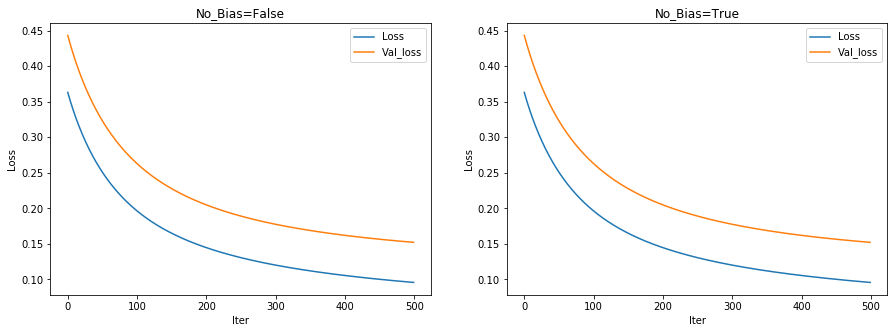

In [20]:
loss =  slr_0.loss
val_loss = slr_0.val_loss

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('No_Bias=False')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.plot(range(len(loss)), loss, label='Loss')
plt.plot(range(len(val_loss)), val_loss, label='Val_loss')
plt.legend()


loss =  slr_0.loss
val_loss = slr_0.val_loss

plt.subplot(1, 2, 2)
plt.title('No_Bias=True')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.plot(range(len(loss)), loss, label='Loss')
plt.plot(range(len(val_loss)), val_loss, label='Val_loss')
plt.legend()
plt.show()

## Scikitlern

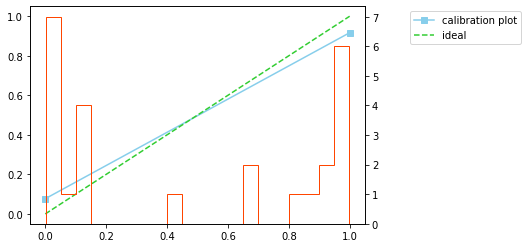

In [21]:
from sklearn.calibration import calibration_curve

#clf_predict_proba = clf.predict_proba(X_test_transformed)

prob = clf.predict_proba(X_test_transformed)[:, 1] # 目的変数が1である確率を予測
prob_true, prob_pred = calibration_curve(y_true=y_test, y_prob=clf_predict, n_bins=20)

fig, ax1 = plt.subplots()
ax1.plot(prob_pred, prob_true, marker='s', label='calibration plot', color='skyblue') # キャリプレーションプロットを作成
ax1.plot([0, 1], [0, 1], linestyle='--', label='ideal', color='limegreen') # 45度線をプロット
ax1.legend(bbox_to_anchor=(1.12, 1), loc='upper left')
ax2 = ax1.twinx() # 2軸を追加
ax2.hist(prob, bins=20, histtype='step', color='orangered') # スコアのヒストグラムも併せてプロット
plt.show()

### ネットで見つけたものをそのまま出力

# 【問題8】決定領域の可視化
決定領域を可視化してください。

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

## Plot

In [23]:
features_2_X = X_train_transformed[:,[0,2]]
print(features_2_X.shape)

(75, 2)


In [24]:
#特徴量をsepallength, petallengthにする。
new = X_train_transformed[:, [0, 2]]

#y_trainを1次元にする
y_new = y_train.values.reshape(-1)
y_new.shape

(75,)

In [25]:
# 学習(biasFalse, verbos=False)
# Scrtchモデルを特徴量2の訓練データを学習させる。
clf_slr = ScratchLogisticRegression(num_iter=500, lr=0.1, bias=False, verbose=False)
clf_slr.fit(new, y_train)


In [26]:
# Sklearnモデルを特徴量2の訓練データを学習させる。
clf_new = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(new, y_new) #訓練用データを学習させる
clf_new.fit(new, y_new)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

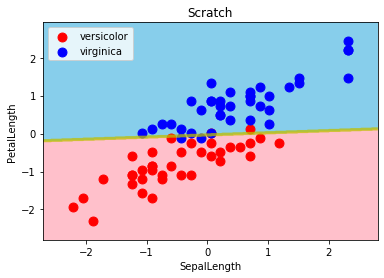

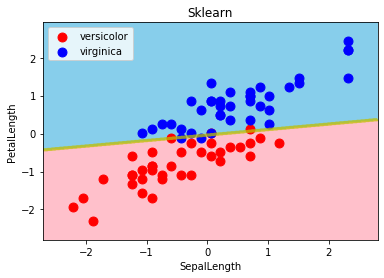

In [27]:
#Scratch
decision_region(new, y_new, clf_slr, title='Scratch', xlabel='SepalLength', ylabel='PetalLength', target_names=['versicolor', 'virginica'])
#Sklearn
decision_region(new, y_new, clf_new, title='Sklearn', xlabel='SepalLength', ylabel='PetalLength', target_names=['versicolor', 'virginica'])
